In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import folium
import missingno as msno

In [2]:
pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 열 수 제한 해제
pd.set_option('display.width', None)  # 자동 너비 조정 해제
pd.set_option('display.max_colwidth', None)  # 최대 컬럼 너비 해제

# 현재 비흡연자의 직장실 내 간접흡연 노출률 추이 (2022)

In [4]:
KOSIS1 = pd.read_csv('file/KOSIS1_현재_비흡연자의_직장실내_간접흡연_노출률_추이_2022.csv')
KOSIS1.head()

,연도,성별,특성별(1),특성별(2),응답자수(명),분율(%),표준오차
0,2022,전체,전체,19세이상,2455,6.1,0.6
1,2022,전체,전체,19세이상(표준화),2455,6.3,0.6
2,2022,전체,연령별1,19-29세,297,4.7,1.2
3,2022,전체,연령별1,30-39세,389,8.9,1.5
4,2022,전체,연령별1,40-49세,480,8.5,1.5


In [5]:
KOSIS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       72 non-null     int64  
 1   성별       72 non-null     object 
 2   특성별(1)   72 non-null     object 
 3   특성별(2)   72 non-null     object 
 4   응답자수(명)  72 non-null     int64  
 5   분율(%)    72 non-null     float64
 6   표준오차     72 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.1+ KB


## 전체

In [6]:
KOSIS1_whole = KOSIS1.iloc[:24]
KOSIS1_whole.head()

,연도,성별,특성별(1),특성별(2),응답자수(명),분율(%),표준오차
0,2022,전체,전체,19세이상,2455,6.1,0.6
1,2022,전체,전체,19세이상(표준화),2455,6.3,0.6
2,2022,전체,연령별1,19-29세,297,4.7,1.2
3,2022,전체,연령별1,30-39세,389,8.9,1.5
4,2022,전체,연령별1,40-49세,480,8.5,1.5


In [7]:
round(KOSIS1_whole.iloc[:, -3:].describe(), 2)

,응답자수(명),분율(%),표준오차
count,24.00,24.00,24.00
mean,818.33,6.03,1.13
std,707.14,1.64,0.38
min,297.00,1.70,0.60
25%,469.00,5.57,0.85
50%,516.00,6.05,1.15
75%,580.00,6.32,1.32
max,2455.00,8.90,1.90


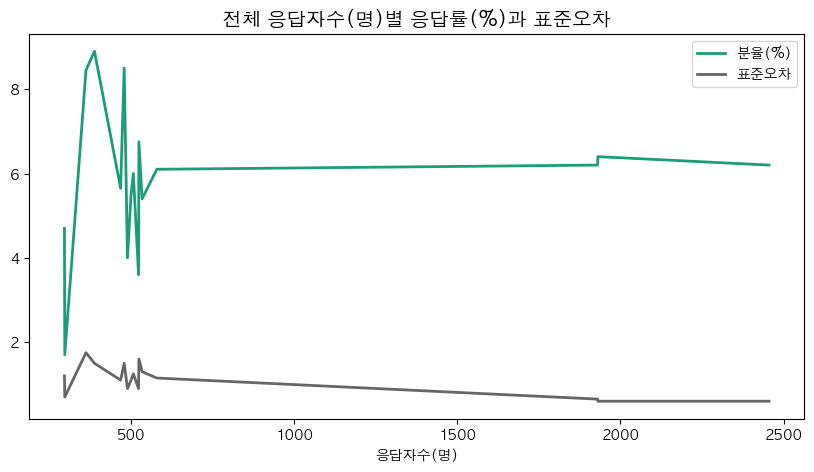

In [21]:
KOSIS1_whole.groupby('응답자수(명)')[['분율(%)', '표준오차']].mean().plot(kind='line', figsize=(10, 5), cmap='Dark2', linewidth=2)
plt.title('전체 응답자수(명)별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [180]:
KOSIS1_whole[['응답자수(명)', '분율(%)', '표준오차']].corr()

,응답자수(명),분율(%),표준오차
응답자수(명),1.000000,0.065779,-0.694007
분율(%),0.065779,1.000000,0.583614
표준오차,-0.694007,0.583614,1.000000


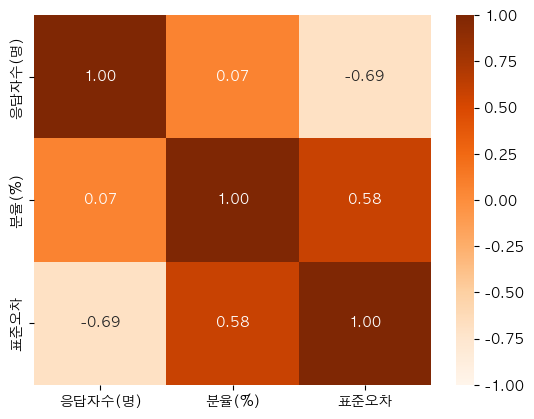

In [23]:
# 전체 응답자수(명)과 응답률(%), 표준오차 상관관계
sns.heatmap(KOSIS1_whole[['응답자수(명)', '분율(%)', '표준오차']].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Oranges', fmt='.2f')  # RdPu
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [342]:
KOSIS1_whole.loc[:9, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
0,19세이상,6.1,0.6
1,19세이상(표준화),6.3,0.6
2,19-29세,4.7,1.2
3,30-39세,8.9,1.5
4,40-49세,8.5,1.5
5,50-59세,4.0,0.9
6,60-69세,5.5,1.1
7,70세이상,1.7,0.7
8,19-64세,6.4,0.6
9,65세이상,3.6,0.9


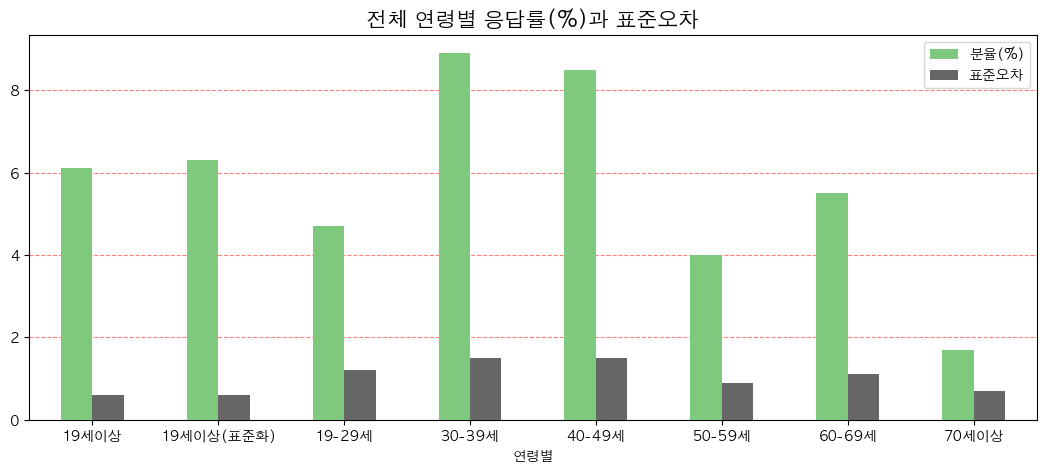

In [172]:
a = KOSIS1_whole.loc[:7, ['특성별(2)', '분율(%)', '표준오차']]
ax = a.set_index('특성별(2)').plot(kind='bar', figsize=(13, 5), rot=0, cmap='Accent', zorder=3)
plt.grid(axis='y', color='red', alpha=0.5, linestyle='--', zorder=0)
plt.xlabel('연령별')
plt.title('전체 연령별 응답률(%)과 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [174]:
KOSIS1_whole.loc[17:18, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
17,동,6.3,0.7
18,읍면,7.8,1.9


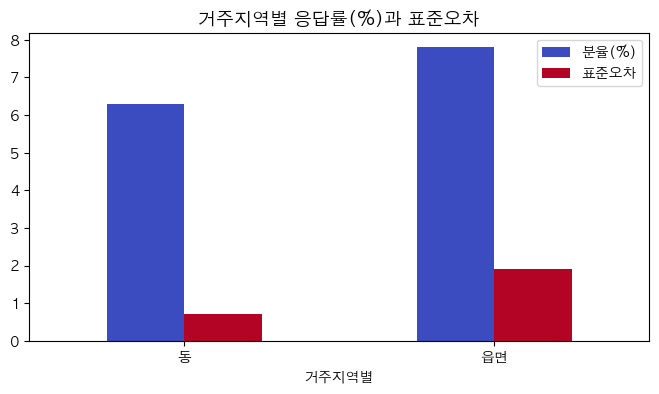

In [271]:
b = KOSIS1_whole.loc[17:18, ['특성별(2)', '분율(%)', '표준오차']]
ax = b.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(8, 4), rot=0, cmap='coolwarm')
plt.xlabel('거주지역별')
plt.title('거주지역별 응답률(%)과 표준오차', fontdict={'size':13})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [186]:
KOSIS1_whole.loc[19:, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
19,하,8.8,1.8
20,중하,5.6,1.1
21,중,5.9,1.3
22,중상,6.2,1.2
23,상,5.7,1.4


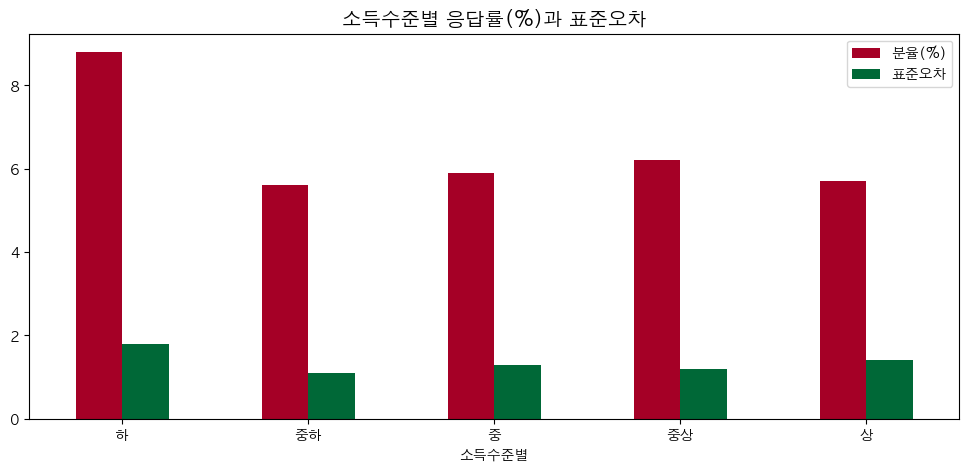

In [22]:
c = KOSIS1_whole.loc[19:, ['특성별(2)', '분율(%)', '표준오차']]
ax = c.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(12, 5), rot=0, cmap='RdYlGn')
plt.xlabel('소득수준별')
plt.title('소득수준별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 남자

In [25]:
KOSIS1_male = KOSIS1.iloc[24:48]
KOSIS1_male.head()

,연도,성별,특성별(1),특성별(2),응답자수(명),분율(%),표준오차
24,2022,남자,전체,19세이상,1027,8.1,0.9
25,2022,남자,전체,19세이상(표준화),1027,8.6,1.1
26,2022,남자,연령별1,19-29세,95,7.7,2.6
27,2022,남자,연령별1,30-39세,182,12.1,2.3
28,2022,남자,연령별1,40-49세,189,12.4,2.6


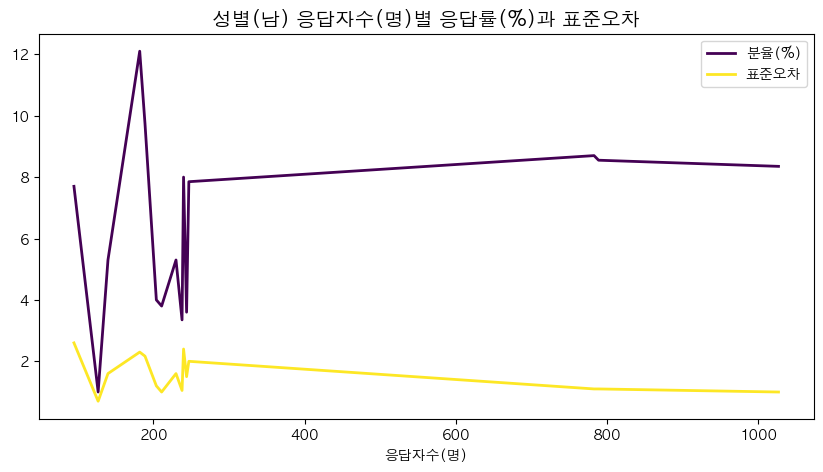

In [26]:
KOSIS1_male.groupby('응답자수(명)')[['분율(%)', '표준오차']].mean().plot(kind='line', figsize=(10, 5), cmap='viridis', linewidth=2)
plt.title('성별(남) 응답자수(명)별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [27]:
KOSIS1_male[['응답자수(명)', '분율(%)', '표준오차']].corr()

,응답자수(명),분율(%),표준오차
응답자수(명),1.000000,0.245437,-0.308891
분율(%),0.245437,1.000000,0.773675
표준오차,-0.308891,0.773675,1.000000


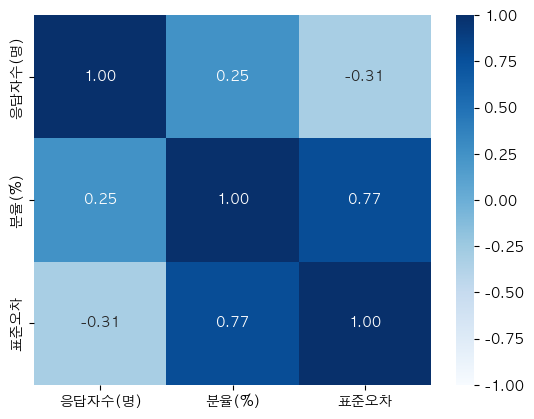

In [28]:
# 성별(남)의 응답자수(명)과 응답률(%), 표준오차 상관관계
sns.heatmap(KOSIS1_male[['응답자수(명)', '분율(%)', '표준오차']].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [191]:
KOSIS1_male.loc[24:31, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
24,19세이상,8.1,0.9
25,19세이상(표준화),8.6,1.1
26,19-29세,7.7,2.6
27,30-39세,12.1,2.3
28,40-49세,12.4,2.6
29,50-59세,4.0,1.2
30,60-69세,5.3,1.6
31,70세이상,1.0,0.7


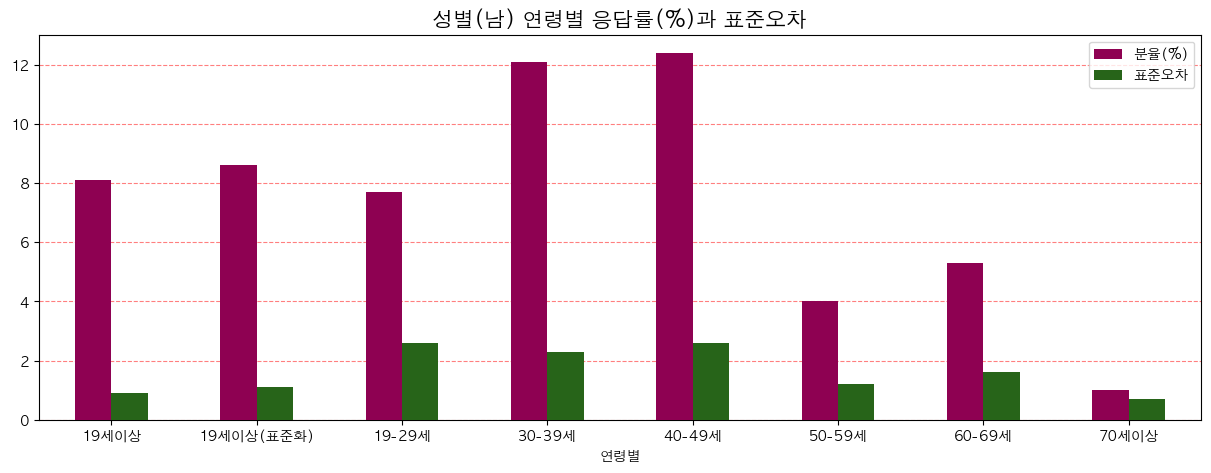

In [192]:
a = KOSIS1_male.loc[24:31, ['특성별(2)', '분율(%)', '표준오차']]
ax = a.set_index('특성별(2)').plot(kind='bar', figsize=(15, 5), rot=0, cmap='PiYG', zorder=3)
plt.grid(axis='y', color='red', alpha=0.5, linestyle='--', zorder=0)
plt.xlabel('연령별')
plt.title('성별(남) 연령별 응답률(%)과 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [197]:
KOSIS1_male.loc[41:42, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
41,동,8.7,1.2
42,읍면,0.0,0.0


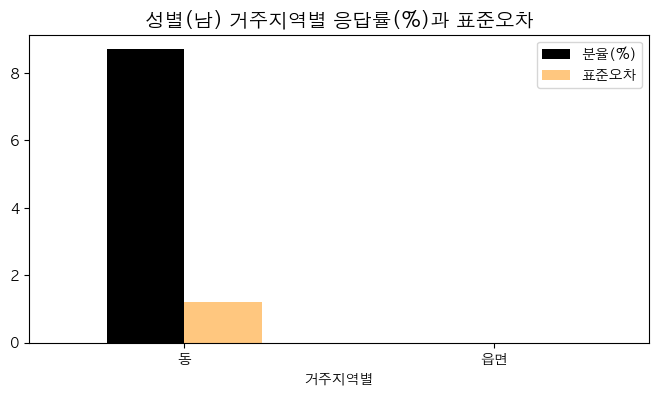

In [38]:
b = KOSIS1_male.loc[41:42, ['특성별(2)', '분율(%)', '표준오차']]
ax = b.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(8, 4), rot=0, cmap='copper')
plt.xlabel('거주지역별')
plt.title('성별(남) 거주지역별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [202]:
KOSIS1_male.loc[42:, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
42,읍면,0.0,0.0
43,하,0.0,0.0
44,중하,8.2,1.9
45,중,0.0,0.0
46,중상,8.2,2.2
47,상,8.9,2.7


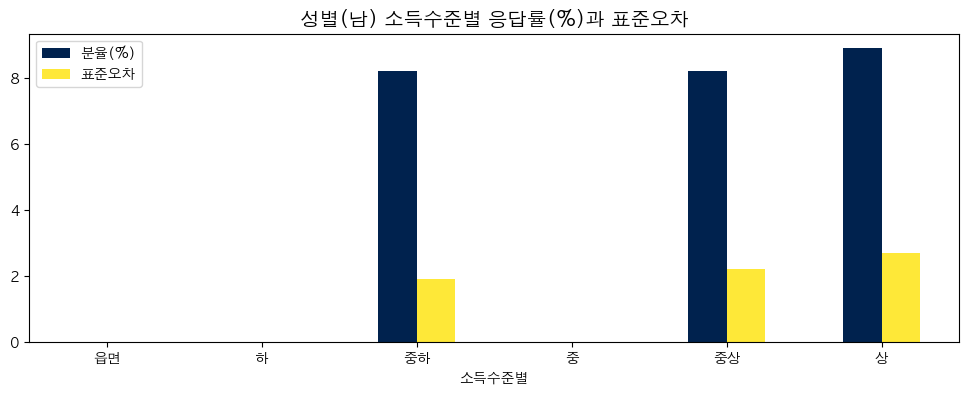

In [44]:
c = KOSIS1_male.loc[42:, ['특성별(2)', '분율(%)', '표준오차']]
ax = c.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(12, 4), rot=0, cmap='cividis')
plt.xlabel('소득수준별')
plt.title('성별(남) 소득수준별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 여자

In [30]:
KOSIS1_female = KOSIS1.iloc[48:]
KOSIS1_female.head()

,연도,성별,특성별(1),특성별(2),응답자수(명),분율(%),표준오차
48,2022,여자,전체,19세이상,1428,4.2,0.5
49,2022,여자,전체,19세이상(표준화),1428,4.2,0.6
50,2022,여자,연령별1,19-29세,202,2.8,1.1
51,2022,여자,연령별1,30-39세,207,5.0,1.4
52,2022,여자,연령별1,40-49세,291,4.8,1.3


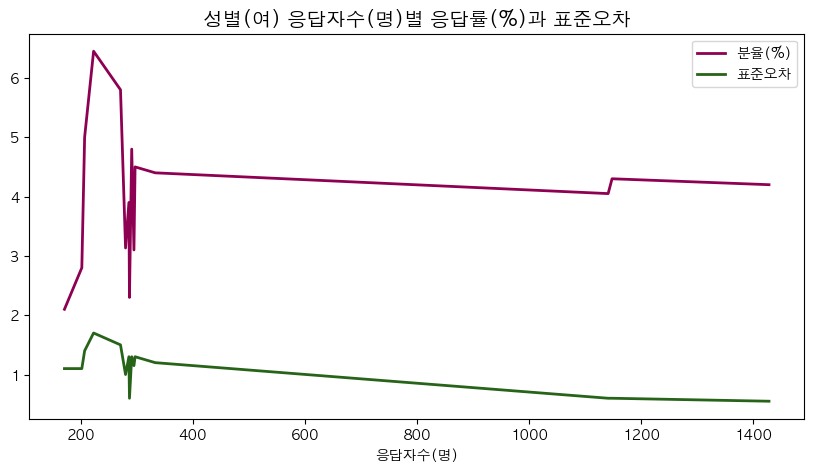

In [31]:
KOSIS1_female.groupby('응답자수(명)')[['분율(%)', '표준오차']].mean().plot(kind='line', figsize=(10, 5), cmap='PiYG', linewidth=2)
plt.title('성별(여) 응답자수(명)별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [32]:
KOSIS1_female[['응답자수(명)', '분율(%)', '표준오차']].corr()

,응답자수(명),분율(%),표준오차
응답자수(명),1.000000,0.055573,-0.625784
분율(%),0.055573,1.000000,0.681098
표준오차,-0.625784,0.681098,1.000000


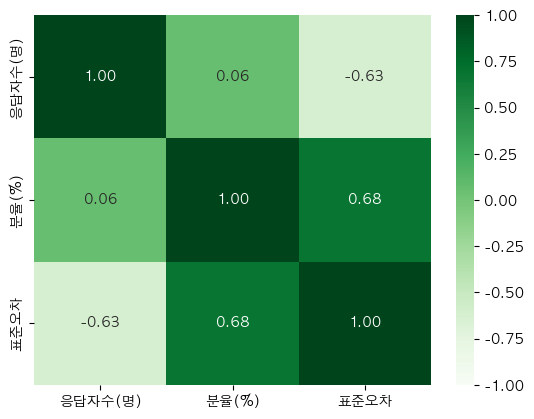

In [33]:
# 성별(여)의 응답자수(명)과 응답률(%), 표준오차 상관관계
sns.heatmap(KOSIS1_female[['응답자수(명)', '분율(%)', '표준오차']].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Greens', fmt='.2f')  # RdBu
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [207]:
KOSIS1_female.loc[48:55, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
48,19세이상,4.2,0.5
49,19세이상(표준화),4.2,0.6
50,19-29세,2.8,1.1
51,30-39세,5.0,1.4
52,40-49세,4.8,1.3
53,50-59세,3.9,1.3
54,60-69세,5.8,1.5
55,70세이상,2.1,1.1


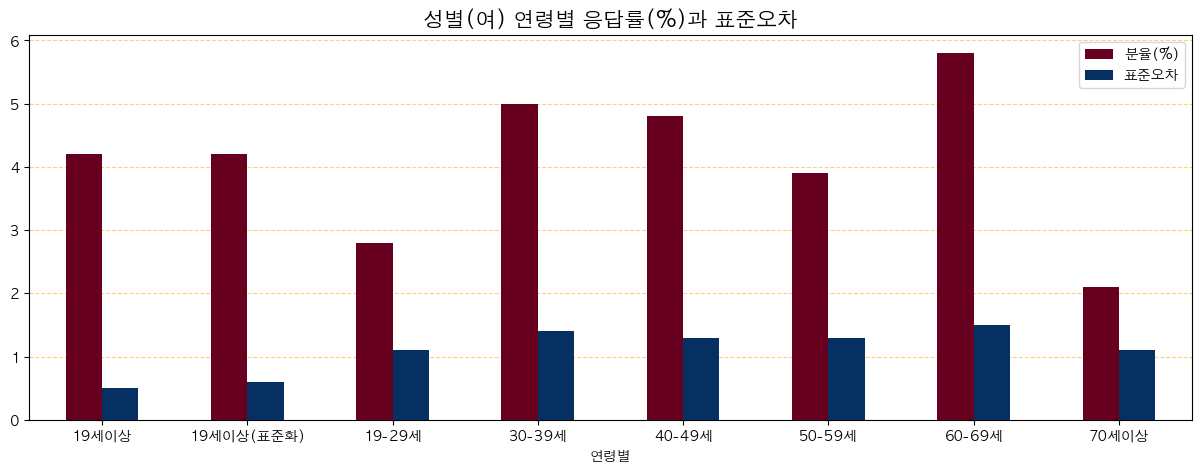

In [208]:
a = KOSIS1_female.loc[48:55, ['특성별(2)', '분율(%)', '표준오차']]
ax = a.set_index('특성별(2)').plot(kind='bar', figsize=(15, 5), rot=0, cmap='RdBu', zorder=3)
plt.grid(axis='y', color='orange', alpha=0.5, linestyle='--', zorder=0)
plt.xlabel('연령별')
plt.title('성별(여) 연령별 응답률(%)과 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [209]:
KOSIS1_female.loc[65:66, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
65,동,4.0,0.6
66,읍면,0.0,0.0


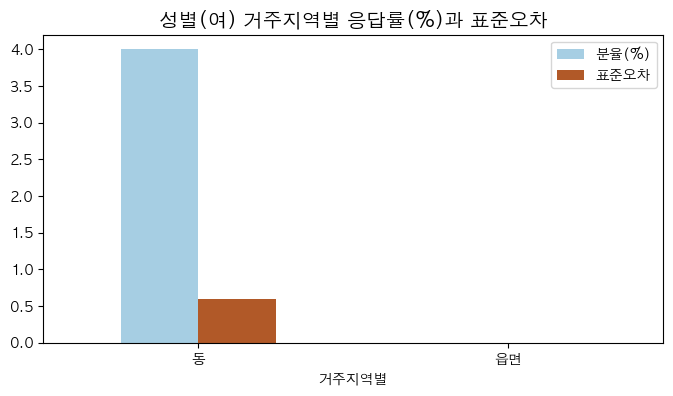

In [48]:
b = KOSIS1_female.loc[65:66, ['특성별(2)', '분율(%)', '표준오차']]
ax = b.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(8, 4), rot=0, cmap='Paired')
plt.xlabel('거주지역별')
plt.title('성별(여) 거주지역별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [49]:
KOSIS1_female.loc[67:, ['특성별(2)', '분율(%)', '표준오차']]

,특성별(2),분율(%),표준오차
67,하,6.8,1.9
68,중하,2.7,0.9
69,중,4.4,1.3
70,중상,4.3,1.2
71,상,3.2,1.2


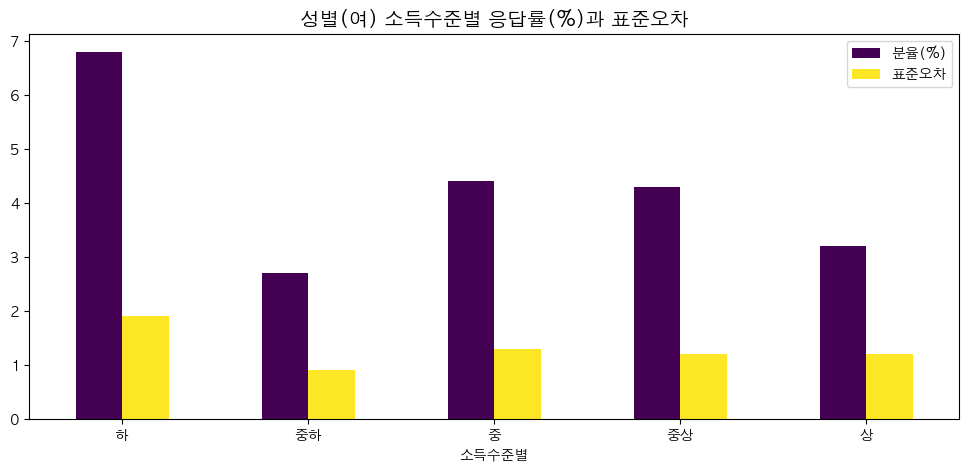

In [50]:
b = KOSIS1_female.loc[67:, ['특성별(2)', '분율(%)', '표준오차']]
ax = b.set_index('특성별(2)')
ax.plot(kind='bar', figsize=(12, 5), rot=0, cmap='viridis')
plt.xlabel('소득수준별')
plt.title('성별(여) 소득수준별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

# 현재 흡연률 일반담배(권렬형) 현재사용률 (2024)

In [51]:
KOSIS2 = pd.read_csv('file/KOSIS2_현재_흡연률_일반담배_궐련_현재사용률_2024.csv')
KOSIS2.head()

,연도,성별,응답자특성별(1),응답자특성별(2),분석대상자수(명),흡연율,표준오차
0,2024,전체,전체,소계,54653,3.6,0.1
1,2024,전체,학년별,중1,9887,0.5,0.1
2,2024,전체,학년별,중2,9725,1.9,0.1
3,2024,전체,학년별,중3,9475,2.8,0.2
4,2024,전체,학년별,고1,8972,4.0,0.3


In [52]:
KOSIS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연도         78 non-null     int64  
 1   성별         78 non-null     object 
 2   응답자특성별(1)  78 non-null     object 
 3   응답자특성별(2)  78 non-null     object 
 4   분석대상자수(명)  78 non-null     int64  
 5   흡연율        78 non-null     float64
 6   표준오차       78 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ KB


In [53]:
round(KOSIS2.iloc[:, -3:].describe(), 2)

,분석대상자수(명),흡연율,표준오차
count,78.00,78.00,78.00
mean,5605.44,3.72,0.48
std,8433.67,1.78,0.28
min,495.00,0.50,0.10
25%,1233.00,2.40,0.30
50%,2451.00,3.55,0.50
75%,5105.25,4.75,0.68
max,54653.00,10.50,1.10


In [54]:
KOSIS2.iloc[:, -3:].corr()

,분석대상자수(명),흡연율,표준오차
분석대상자수(명),1.000000,-0.050558,-0.542504
흡연율,-0.050558,1.000000,0.462772
표준오차,-0.542504,0.462772,1.000000


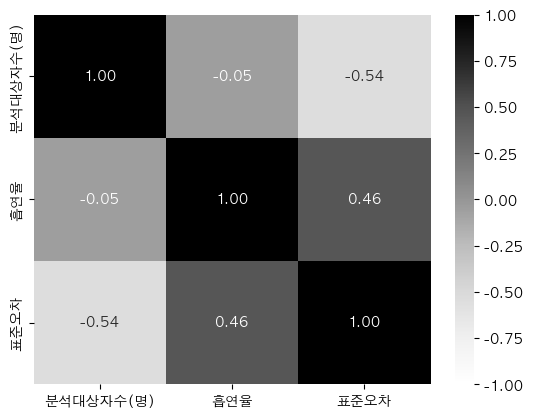

In [58]:
# 전체 응답자수(명)과 응답률(%), 표준오차 상관관계
sns.heatmap(KOSIS2.iloc[:, -3:].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Greys', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

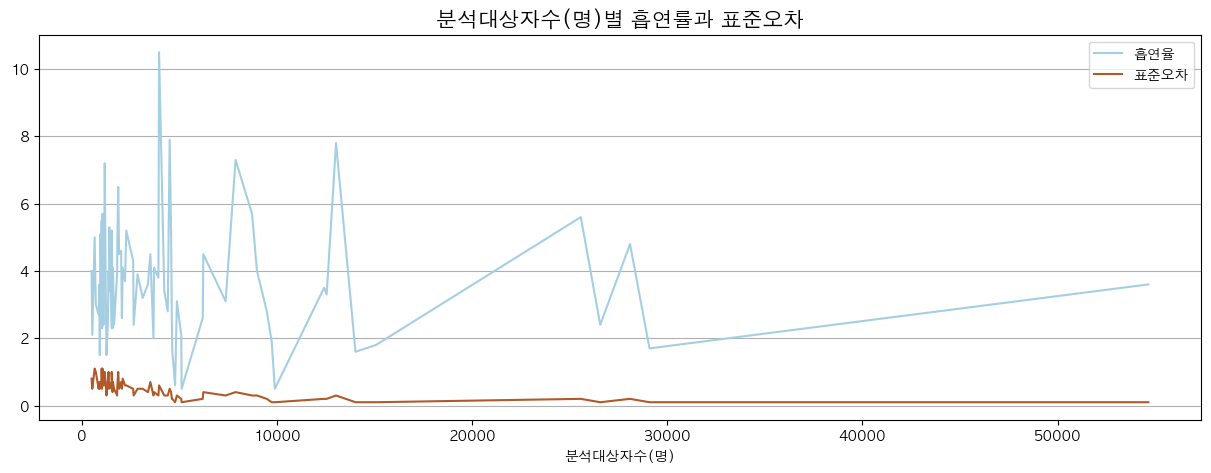

In [59]:
KOSIS2.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='line', figsize=(15, 5), cmap='Paired')
plt.title('분석대상자수(명)별 흡연률과 표준오차', fontdict={'size':15})
plt.grid(axis='y')
plt.show()

## 전체

In [60]:
KOSIS2_whole = KOSIS2.loc[1:25]
KOSIS2_whole.head()

,연도,성별,응답자특성별(1),응답자특성별(2),분석대상자수(명),흡연율,표준오차
1,2024,전체,학년별,중1,9887,0.5,0.1
2,2024,전체,학년별,중2,9725,1.9,0.1
3,2024,전체,학년별,중3,9475,2.8,0.2
4,2024,전체,학년별,고1,8972,4.0,0.3
5,2024,전체,학년별,고2,8719,5.7,0.3


In [61]:
# 전체 분석대상자수(명)과 흡연률 및 표준오차 요약통계량
round(KOSIS2_whole.iloc[:, -3:].describe(), 2)

,분석대상자수(명),흡연율,표준오차
count,25.00,25.00,25.00
mean,6558.36,3.74,0.42
std,7133.65,1.41,0.23
min,1028.00,0.50,0.10
25%,2090.00,3.00,0.30
50%,3114.00,3.90,0.40
75%,8972.00,4.50,0.50
max,29087.00,7.30,1.00


In [62]:
# 분석대상자수(명)의 흡연률과 표준오차 상관관계
KOSIS2_whole.iloc[:, -3:].corr()

,분석대상자수(명),흡연율,표준오차
분석대상자수(명),1.000000,-0.115312,-0.646608
흡연율,-0.115312,1.000000,0.376457
표준오차,-0.646608,0.376457,1.000000


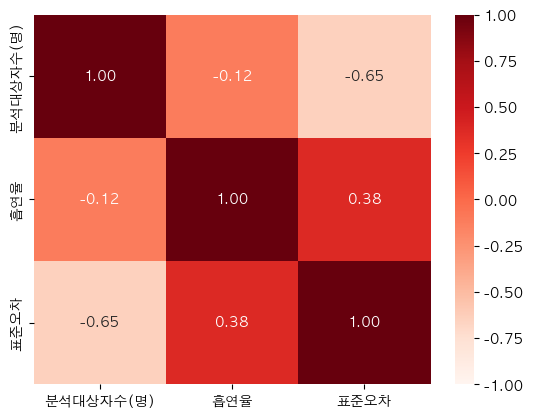

In [65]:
# 분석대상자수(명)의 흡연률과 표준오차 상관관계
sns.heatmap(KOSIS2_whole.iloc[:, -3:].corr(),
            vmin=-1, vmax=1, annot=True, cmap='Reds', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [66]:
KOSIS2_whole.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean()

,흡연율,표준오차
분석대상자수(명),,
1028,3.0,0.5
1365,4.0,1.0
1805,3.9,0.3
1907,4.5,0.5
2010,4.6,0.7
2049,2.6,0.5
2090,4.1,0.8
2209,3.7,0.6
2275,5.2,0.6


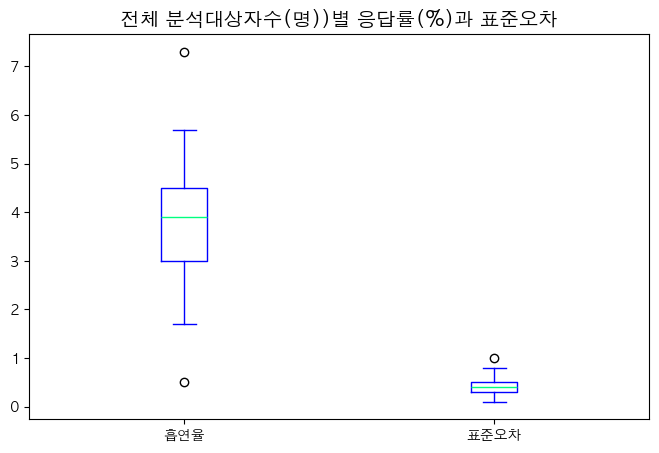

In [67]:
# 전체 분석대상자수(명)별 흡연률과 표준오차 분포 및 이상치 확인
KOSIS2_whole.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='box', figsize=(8, 5), cmap='winter')
plt.title('전체 분석대상자수(명))별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [68]:
KOSIS2_whole.loc[:6, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중1,0.5,0.1
중2,1.9,0.1
중3,2.8,0.2
고1,4.0,0.3
고2,5.7,0.3
고3,7.3,0.4


In [69]:
KOSIS2_whole.loc[:6, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.956462
표준오차,0.956462,1.000000


In [70]:
KOSIS2_whole.loc[:6, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,6.000000,6.000000
mean,3.700000,0.233333
std,2.503597,0.121106
min,0.500000,0.100000
25%,2.125000,0.125000
50%,3.400000,0.250000
75%,5.275000,0.300000
max,7.300000,0.400000


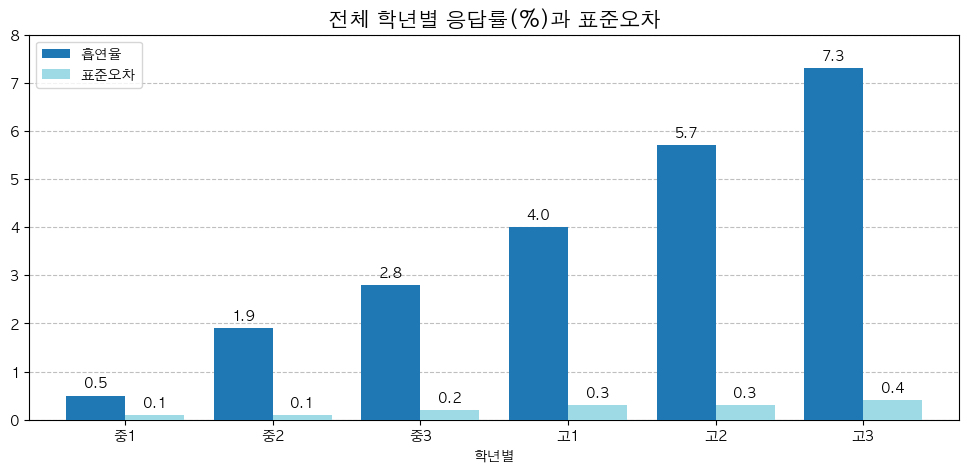

In [71]:
# 전체 학년별(중1~고3) 흡연률과 표준오차
a = KOSIS2_whole.loc[:6, ['응답자특성별(2)', '흡연율', '표준오차']]
ax = a.set_index('응답자특성별(2)').plot(kind='bar', figsize=(12, 5), rot=0, cmap='tab20', zorder=3, width=0.8)
plt.grid(axis='y', color='gray', alpha=0.5, linestyle='--', zorder=0)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('학년별')
plt.title('전체 학년별 응답률(%)과 표준오차', fontdict={'size':15})
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중앙
        p.get_height() + 0.1,           # 막대 높이 위에 약간 띄운 위치
        f'{p.get_height()}',            # 표시할 값 (정수로 변환)
        ha='center',                    # 수평 정렬
        va='bottom',                    # 수직 정렬
        fontsize=10                     # 글꼴 크기
    )
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [72]:
KOSIS2_whole.loc[7:8, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중학교,1.7,0.1
고등학교,5.6,0.2


In [73]:
KOSIS2_whole.loc[7:8, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.0,1.0
표준오차,1.0,1.0


In [74]:
KOSIS2_whole.loc[7:8, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,2.000000,2.000000
mean,3.650000,0.150000
std,2.757716,0.070711
min,1.700000,0.100000
25%,2.675000,0.125000
50%,3.650000,0.150000
75%,4.625000,0.175000
max,5.600000,0.200000


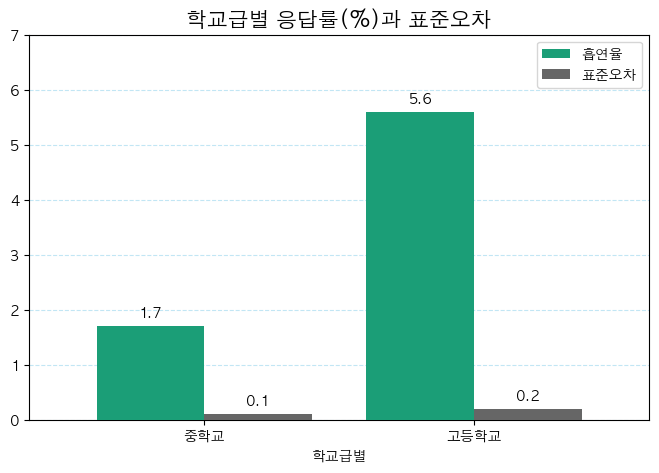

In [75]:
# 학교급별(중학교, 고등학고) 흡연률과 표준오차
b = KOSIS2_whole.loc[7:8, ['응답자특성별(2)', '흡연율', '표준오차']]
ax = b.set_index('응답자특성별(2)').plot(kind='bar', figsize=(8, 5), rot=0, cmap='Dark2', zorder=3, width=0.8)
plt.grid(axis='y', color='skyblue', alpha=0.5, linestyle='--', zorder=0)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.xlabel('학교급별')
plt.title('학교급별 응답률(%)과 표준오차', fontdict={'size':15})
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중앙
        p.get_height() + 0.1,           # 막대 높이 위에 약간 띄운 위치
        f'{p.get_height()}',            # 표시할 값 (정수로 변환)
        ha='center',                    # 수평 정렬
        va='bottom',                    # 수직 정렬
        fontsize=10                     # 글꼴 크기
    )
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [76]:
KOSIS2_whole.loc[9:, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
서울,3.1,0.3
부산,3.2,0.5
대구,2.4,0.3
인천,3.6,0.4
광주,4.1,0.8
대전,2.6,0.5
울산,3.9,0.3
세종,3.0,0.5
경기,3.5,0.2


In [77]:
KOSIS2_whole.loc[9:, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.471972
표준오차,0.471972,1.000000


In [78]:
KOSIS2_whole.loc[9:, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,17.000000,17.000000
mean,3.770588,0.523529
std,0.749804,0.201648
min,2.400000,0.200000
25%,3.200000,0.400000
50%,3.900000,0.500000
75%,4.300000,0.600000
max,5.200000,1.000000


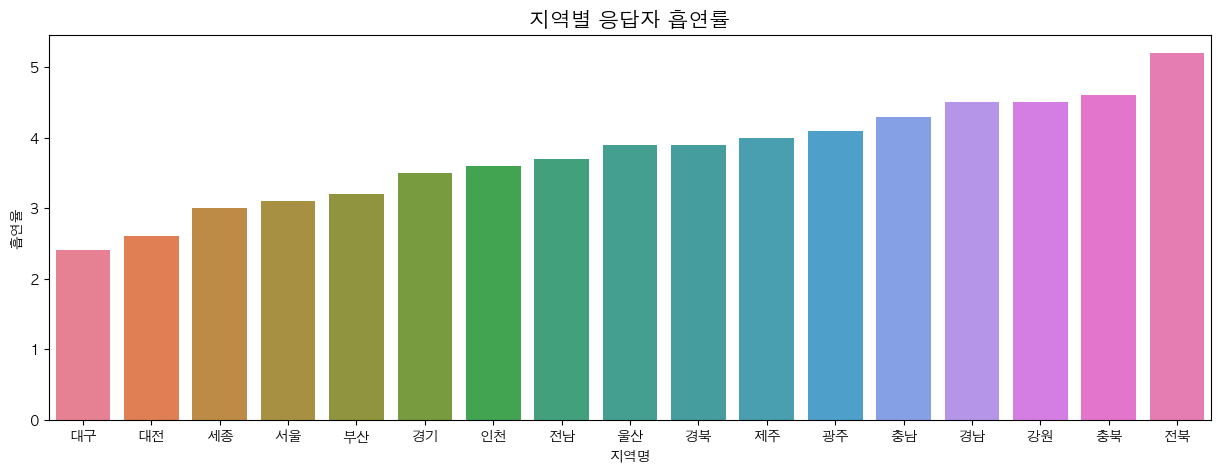

In [79]:
# 지역별(서울~제주) 흡연률
# sns.FacetGrid 이용
c = KOSIS2_whole.loc[9:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('흡연율')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='흡연율', hue='응답자특성별(2)', errorbar=('ci', 95))
plt.xlabel('지역명')
plt.title('지역별 응답자 흡연률', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

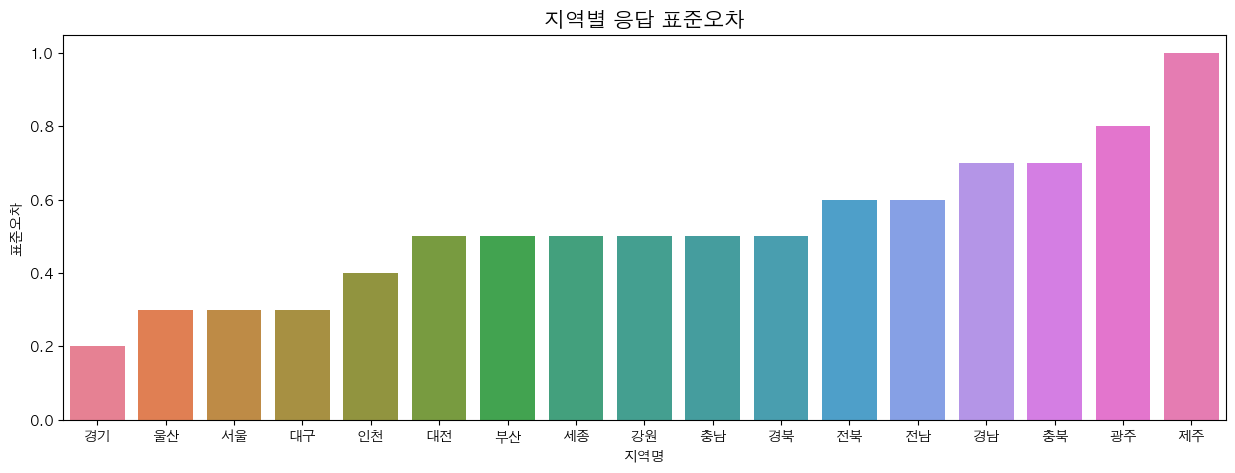

In [80]:
# 지역별(서울~제주) 표준오차
# sns.FacetGrid 이용
c = KOSIS2_whole.loc[9:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('표준오차')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='표준오차', hue='응답자특성별(2)', errorbar=('ci', 95))
plt.xlabel('지역명')
plt.title('지역별 응답 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

# 남자

In [81]:
KOSIS2_male = KOSIS2.iloc[26:52]
KOSIS2_male.head()

,연도,성별,응답자특성별(1),응답자특성별(2),분석대상자수(명),흡연율,표준오차
26,2024,남학생,전체,소계,28090,4.8,0.2
27,2024,남학생,학년별,중1,5110,0.5,0.1
28,2024,남학생,학년별,중2,5091,2.1,0.2
29,2024,남학생,학년별,중3,4866,3.1,0.3
30,2024,남학생,학년별,고1,4572,5.1,0.4


In [82]:
# 전체 분석대상자수(명)과 흡연률 및 표준오차 요약통계량
round(KOSIS2_male.iloc[:, -3:].describe(), 2)

,분석대상자수(명),흡연율,표준오차
count,26.00,26.00,26.00
mean,4321.54,4.92,0.62
std,6030.17,2.05,0.32
min,495.00,0.50,0.10
25%,1112.00,4.03,0.40
50%,1704.00,5.00,0.60
75%,4792.50,5.45,0.95
max,28090.00,10.50,1.10


In [83]:
# 분석대상자수(명)의 흡연률과 표준오차 상관관계
KOSIS2_male.iloc[:, -3:].corr()

,분석대상자수(명),흡연율,표준오차
분석대상자수(명),1.000000,-0.080402,-0.617769
흡연율,-0.080402,1.000000,0.419736
표준오차,-0.617769,0.419736,1.000000


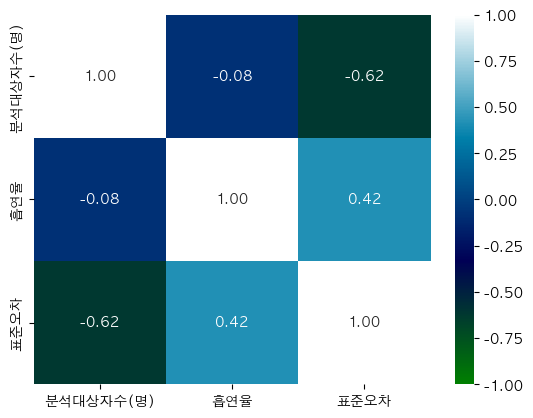

In [84]:
# 성별(남) 분석대상자수(명)의 흡연률과 표준오차 상관관계
sns.heatmap(KOSIS2_male.iloc[:, -3:].corr(),
            vmin=-1, vmax=1, annot=True, cmap='ocean', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [85]:
KOSIS2_male.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean()

,흡연율,표준오차
분석대상자수(명),,
495,4.0,0.8
653,5.0,1.1
948,5.1,0.6
1010,5.3,0.8
1012,5.5,1.1
1054,5.7,1.1
1105,5.0,1.0
1133,3.5,0.6
1170,7.2,1.0


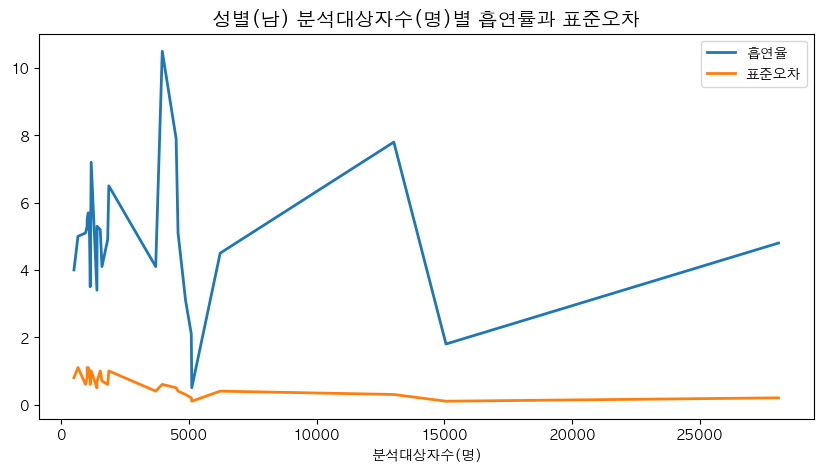

In [86]:
KOSIS2_male.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='line', figsize=(10, 5), linewidth=2)
plt.title('성별(남) 분석대상자수(명)별 흡연률과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

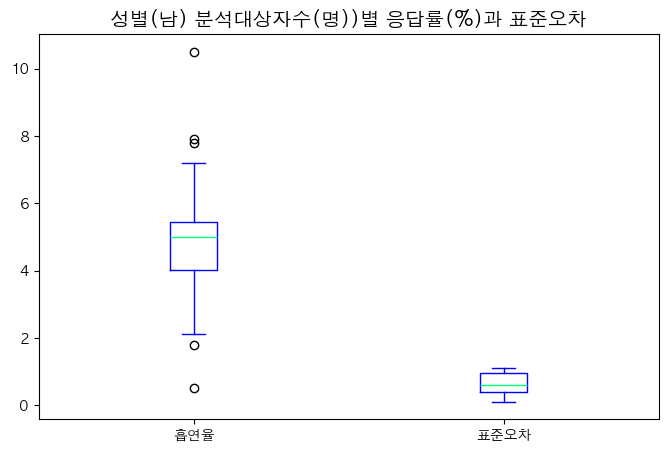

In [87]:
# 전체 분석대상자수(명)별 흡연률과 표준오차 분포 및 이상치 확인
KOSIS2_male.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='box', figsize=(8, 5), cmap='winter')
plt.title('성별(남) 분석대상자수(명))별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [88]:
KOSIS2_male.loc[27:32, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중1,0.5,0.1
중2,2.1,0.2
중3,3.1,0.3
고1,5.1,0.4
고2,7.9,0.5
고3,10.5,0.6


In [89]:
KOSIS2_male.loc[27:32, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.985579
표준오차,0.985579,1.000000


In [90]:
KOSIS2_male.loc[27:32, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,6.000000,6.000000
mean,4.866667,0.350000
std,3.763863,0.187083
min,0.500000,0.100000
25%,2.350000,0.225000
50%,4.100000,0.350000
75%,7.200000,0.475000
max,10.500000,0.600000


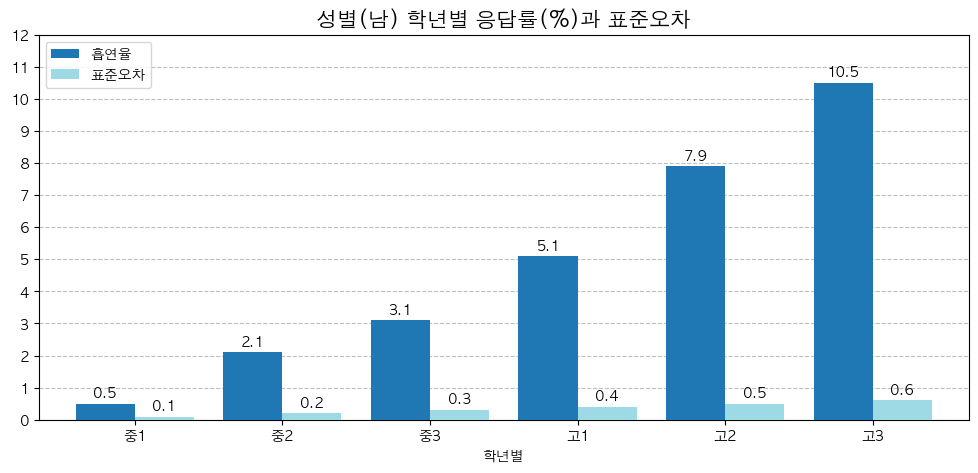

In [91]:
# 성별(남) 학년별(중1~고3) 흡연률과 표준오차
a = KOSIS2_male.loc[27:32, ['응답자특성별(2)', '흡연율', '표준오차']]
ax = a.set_index('응답자특성별(2)').plot(kind='bar', figsize=(12, 5), rot=0, cmap='tab20', zorder=3, width=0.8)
plt.grid(axis='y', color='gray', alpha=0.5, linestyle='--', zorder=0)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlabel('학년별')
plt.title('성별(남) 학년별 응답률(%)과 표준오차', fontdict={'size':15})
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중앙
        p.get_height() + 0.1,           # 막대 높이 위에 약간 띄운 위치
        f'{p.get_height()}',            # 표시할 값 (정수로 변환)
        ha='center',                    # 수평 정렬
        va='bottom',                    # 수직 정렬
        fontsize=10                     # 글꼴 크기
    )
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [92]:
KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중학교,1.8,0.1
고등학교,7.8,0.3


In [93]:
KOSIS2_male.loc[33:34, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.0,1.0
표준오차,1.0,1.0


In [42]:
KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,2.000000,2.000000
mean,4.800000,0.200000
std,4.242641,0.141421
min,1.800000,0.100000
25%,3.300000,0.150000
50%,4.800000,0.200000
75%,6.300000,0.250000
max,7.800000,0.300000


/var/folders/4x/sc1vlfq546sgvmk9_m2t10_80000gn/T/ipykernel_66756/1246899310.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode,
/var/folders/4x/sc1vlfq546sgvmk9_m2t10_80000gn/T/ipykernel_66756/1246899310.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode,


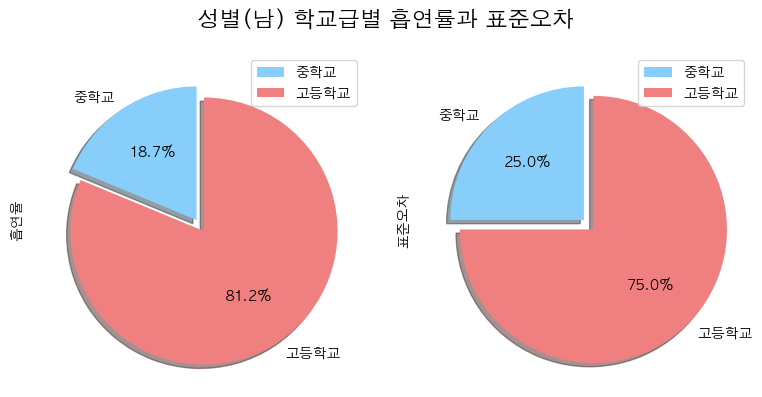

In [43]:
# 학교급별(중학교, 고등학고) 흡연률과 표준오차
explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode, 
                                                                                         autopct='%1.1f%%', shadow=True, startangle=90,
                                                                                         colors=colors, ax=axes[0])
KOSIS2_male.loc[33:34, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode, 
                                                                                         autopct='%1.1f%%', shadow=True, startangle=90,
                                                                                         colors=colors, ax=axes[1])
fig.suptitle('성별(남) 학교급별 흡연률과 표준오차', fontsize=16, weight='bold')
plt.tight_layout()
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [44]:
KOSIS2_male.loc[35:, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
서울,4.1,0.4
부산,4.1,0.7
대구,3.4,0.5
인천,4.9,0.6
광주,5.7,1.1
대전,3.5,0.6
울산,5.1,0.6
세종,4.0,0.8
경기,4.5,0.4


In [45]:
KOSIS2_male.loc[35:, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.645788
표준오차,0.645788,1.000000


In [46]:
KOSIS2_male.loc[35:, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,17.000000,17.000000
mean,4.958824,0.788235
std,0.991248,0.247190
min,3.400000,0.400000
25%,4.100000,0.600000
50%,5.000000,0.800000
75%,5.300000,1.000000
max,7.200000,1.100000


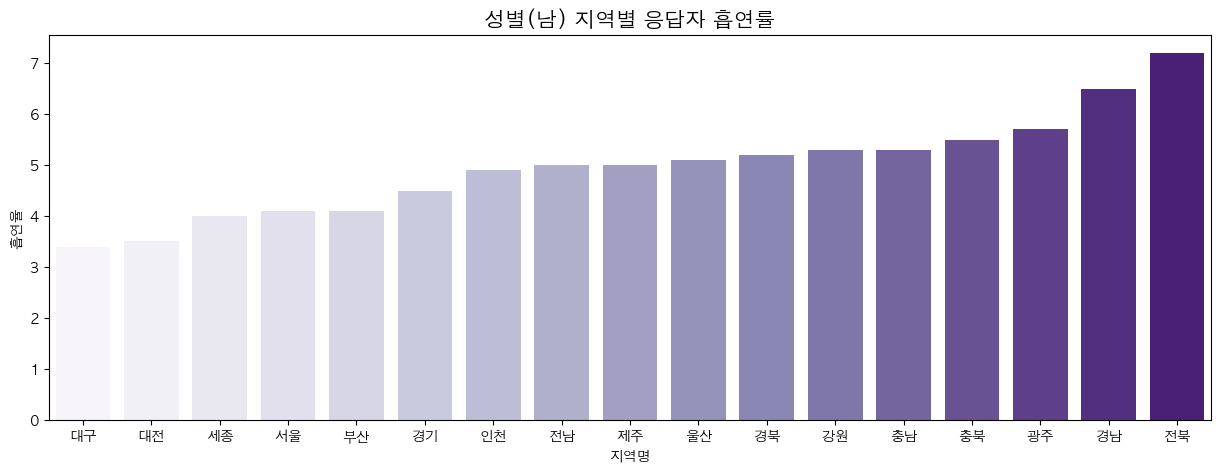

In [47]:
# 지역별(서울~제주) 흡연률
# sns.FacetGrid 이용
c = KOSIS2_male.loc[35:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('흡연율')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='흡연율', hue='응답자특성별(2)', errorbar=('ci', 95), palette='Purples')
plt.xlabel('지역명')
plt.title('성별(남) 지역별 응답자 흡연률', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

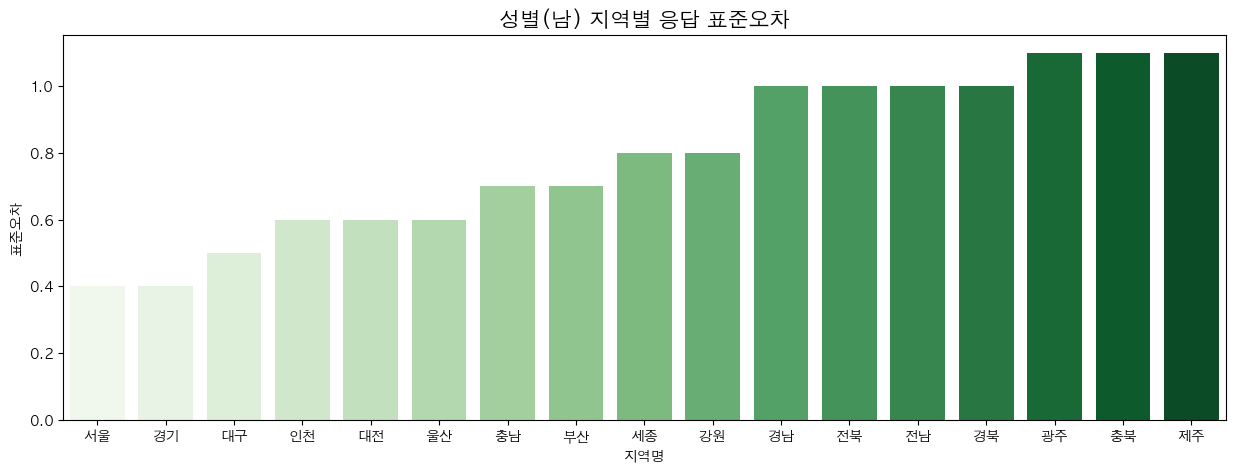

In [48]:
# 지역별(서울~제주) 표준오차
# sns.FacetGrid 이용
c = KOSIS2_male.loc[35:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('표준오차')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='표준오차', hue='응답자특성별(2)', errorbar=('ci', 95), palette='Greens')
plt.xlabel('지역명')
plt.title('성별(남) 지역별 응답 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

# 여자

In [49]:
KOSIS2_female = KOSIS2.iloc[52:]
KOSIS2_female.head()

,연도,성별,응답자특성별(1),응답자특성별(2),분석대상자수(명),흡연율,표준오차
52,2024,여학생,전체,소계,26563,2.4,0.1
53,2024,여학생,학년별,중1,4777,0.6,0.1
54,2024,여학생,학년별,중2,4634,1.6,0.2
55,2024,여학생,학년별,중3,4609,2.5,0.2
56,2024,여학생,학년별,고1,4400,2.8,0.3


In [50]:
# 전체 분석대상자수(명)과 흡연률 및 표준오차 요약통계량
round(KOSIS2_female.iloc[:, -3:].describe(), 2)

,분석대상자수(명),흡연율,표준오차
count,26.00,26.00,26.00
mean,4086.62,2.50,0.42
std,5710.19,0.76,0.23
min,533.00,0.60,0.10
25%,1053.00,2.15,0.22
50%,1545.00,2.40,0.45
75%,4556.75,2.98,0.57
max,26563.00,3.80,1.00


In [51]:
# 분석대상자수(명)의 흡연률과 표준오차 상관관계
KOSIS2_female.iloc[:, -3:].corr()

,분석대상자수(명),흡연율,표준오차
분석대상자수(명),1.000000,-0.079521,-0.625735
흡연율,-0.079521,1.000000,0.380709
표준오차,-0.625735,0.380709,1.000000


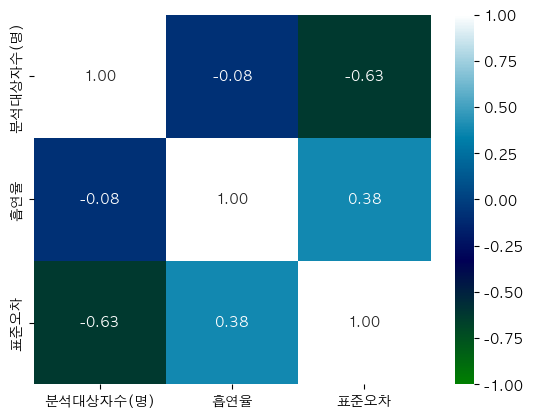

In [52]:
# 성별(남) 분석대상자수(명)의 흡연률과 표준오차 상관관계
sns.heatmap(KOSIS2_female.iloc[:, -3:].corr(),
            vmin=-1, vmax=1, annot=True, cmap='ocean', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [53]:
KOSIS2_female.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean()

,흡연율,표준오차
분석대상자수(명),,
533,2.1,0.5
712,3.0,1.0
857,2.7,0.5
897,3.6,0.7
916,1.5,0.5
998,3.6,0.7
1036,2.3,0.7
1104,2.4,0.6
1105,2.9,0.5


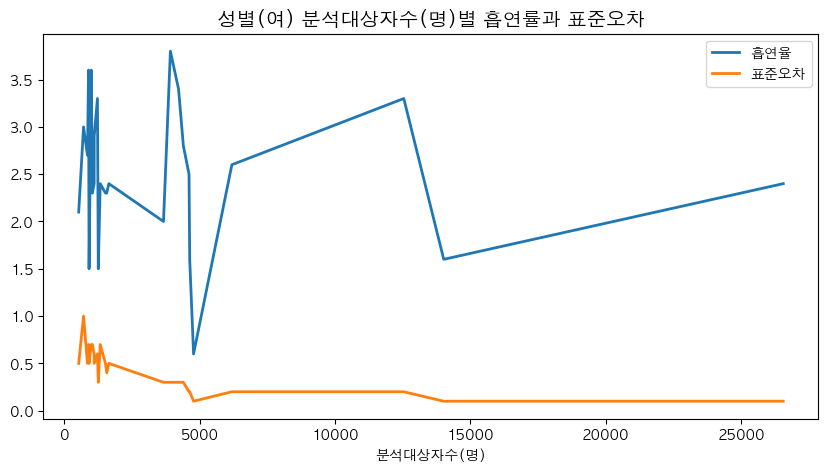

In [54]:
KOSIS2_female.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='line', figsize=(10, 5), linewidth=2)
plt.title('성별(여) 분석대상자수(명)별 흡연률과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

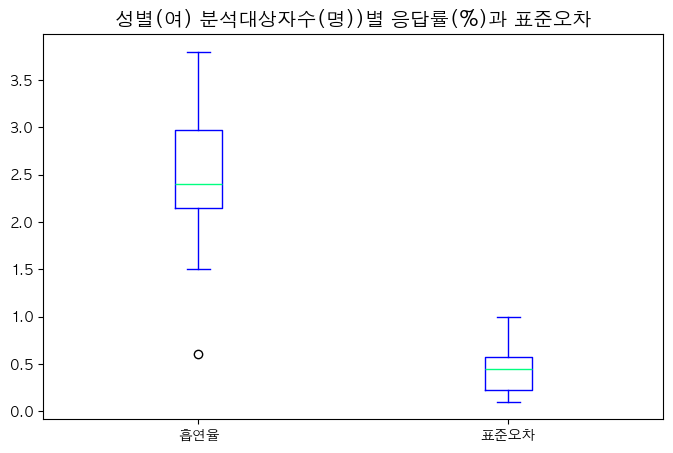

In [55]:
# 전체 분석대상자수(명)별 흡연률과 표준오차 분포 및 이상치 확인
KOSIS2_female.groupby('분석대상자수(명)')[['흡연율', '표준오차']].mean().plot(kind='box', figsize=(8, 5), cmap='winter')
plt.title('성별(여) 분석대상자수(명))별 응답률(%)과 표준오차', fontdict={'size':14})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [56]:
KOSIS2_female.loc[53:58, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중1,0.6,0.1
중2,1.6,0.2
중3,2.5,0.2
고1,2.8,0.3
고2,3.4,0.3
고3,3.8,0.3


In [57]:
KOSIS2_female.loc[53:58, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.931921
표준오차,0.931921,1.000000


In [58]:
KOSIS2_female.loc[53:58, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,6.000000,6.000000
mean,2.450000,0.233333
std,1.182793,0.081650
min,0.600000,0.100000
25%,1.825000,0.200000
50%,2.650000,0.250000
75%,3.250000,0.300000
max,3.800000,0.300000


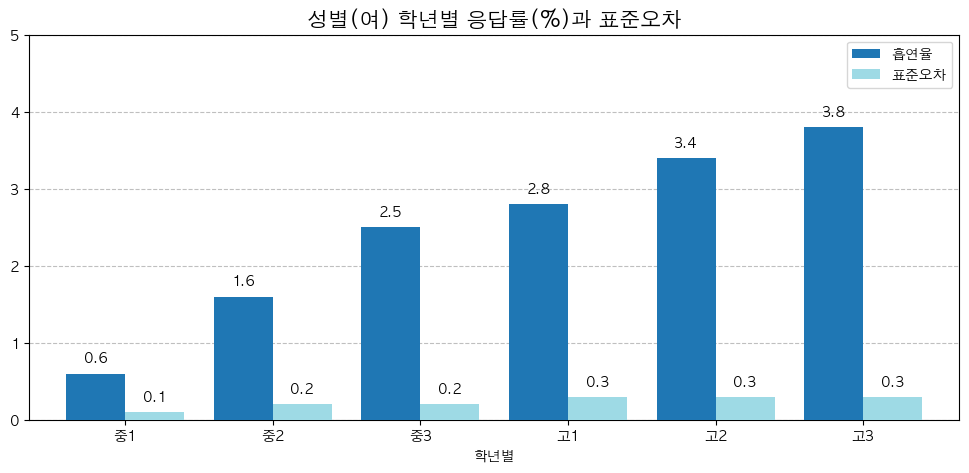

In [59]:
# 성별(남) 학년별(중1~고3) 흡연률과 표준오차
a = KOSIS2_female.loc[53:58, ['응답자특성별(2)', '흡연율', '표준오차']]
ax = a.set_index('응답자특성별(2)').plot(kind='bar', figsize=(12, 5), rot=0, cmap='tab20', zorder=3, width=0.8)
plt.grid(axis='y', color='gray', alpha=0.5, linestyle='--', zorder=0)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.xlabel('학년별')
plt.title('성별(여) 학년별 응답률(%)과 표준오차', fontdict={'size':15})
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중앙
        p.get_height() + 0.1,           # 막대 높이 위에 약간 띄운 위치
        f'{p.get_height()}',            # 표시할 값 (정수로 변환)
        ha='center',                    # 수평 정렬
        va='bottom',                    # 수직 정렬
        fontsize=10                     # 글꼴 크기
    )
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [60]:
KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
중학교,1.6,0.1
고등학교,3.3,0.2


In [61]:
KOSIS2_female.loc[59:60, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.0,1.0
표준오차,1.0,1.0


In [62]:
KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,2.000000,2.000000
mean,2.450000,0.150000
std,1.202082,0.070711
min,1.600000,0.100000
25%,2.025000,0.125000
50%,2.450000,0.150000
75%,2.875000,0.175000
max,3.300000,0.200000


/var/folders/4x/sc1vlfq546sgvmk9_m2t10_80000gn/T/ipykernel_66756/3974539055.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode,
/var/folders/4x/sc1vlfq546sgvmk9_m2t10_80000gn/T/ipykernel_66756/3974539055.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode,


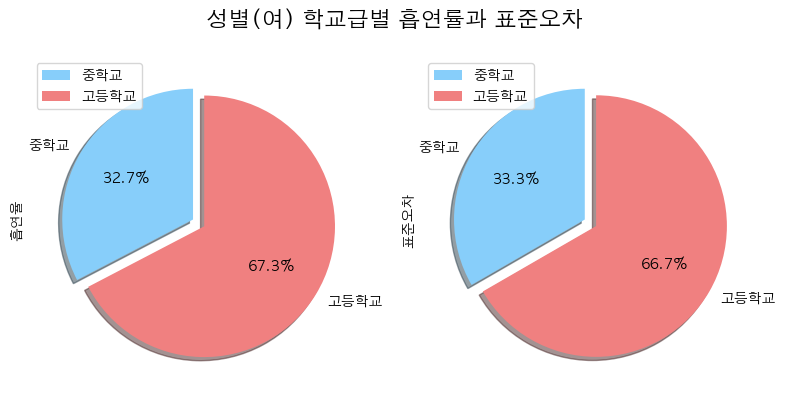

In [72]:
# 학교급별(중학교, 고등학고) 흡연률과 표준오차
explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode, 
                                                                                         autopct='%1.1f%%', shadow=True, startangle=90,
                                                                                         colors=colors, ax=axes[0], legend=False)
KOSIS2_female.loc[59:60, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)').plot(kind='pie', subplots=True, explode=explode, 
                                                                                         autopct='%1.1f%%', shadow=True, startangle=90,
                                                                                         colors=colors, ax=axes[1], legend=True)
fig.suptitle('성별(여) 학교급별 흡연률과 표준오차', fontsize=16, weight='bold')
plt.tight_layout()
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [74]:
KOSIS2_female.loc[61:, ['응답자특성별(2)', '흡연율', '표준오차']].set_index('응답자특성별(2)')

,흡연율,표준오차
응답자특성별(2),,
서울,2.0,0.3
부산,2.3,0.5
대구,1.5,0.3
인천,2.3,0.4
광주,2.3,0.7
대전,1.5,0.5
울산,2.7,0.5
세종,2.1,0.5
경기,2.6,0.2


In [75]:
KOSIS2_female.loc[61:, ['흡연율', '표준오차']].corr()

,흡연율,표준오차
흡연율,1.000000,0.518298
표준오차,0.518298,1.000000


In [76]:
KOSIS2_female.loc[61:, ['응답자특성별(2)', '흡연율', '표준오차']].describe()

,흡연율,표준오차
count,17.000000,17.000000
mean,2.523529,0.541176
std,0.615964,0.190587
min,1.500000,0.200000
25%,2.300000,0.500000
50%,2.400000,0.500000
75%,2.900000,0.700000
max,3.600000,1.000000


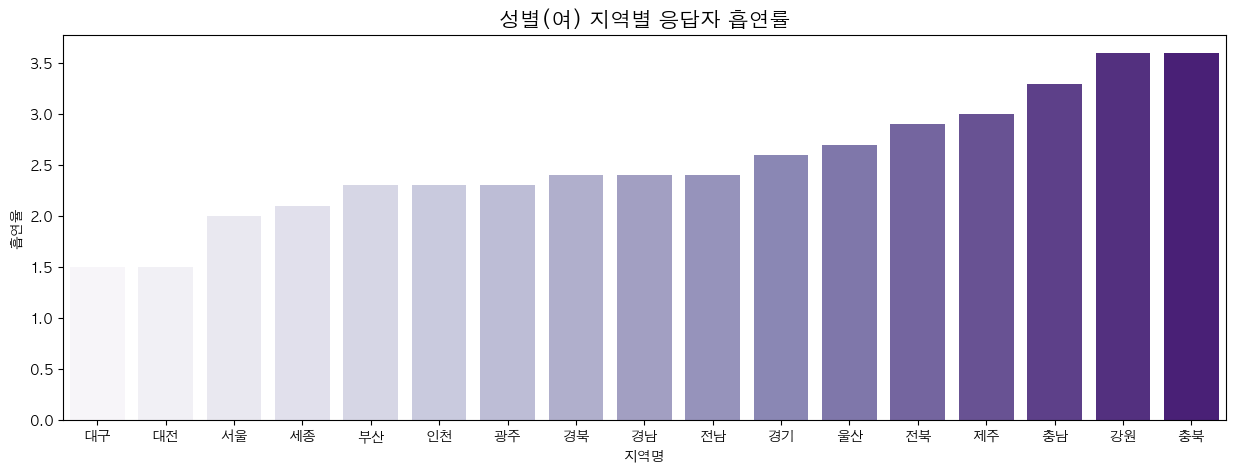

In [78]:
# 지역별(서울~제주) 흡연률
# sns.FacetGrid 이용
c = KOSIS2_female.loc[61:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('흡연율')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='흡연율', hue='응답자특성별(2)', errorbar=('ci', 95), palette='Purples')
plt.xlabel('지역명')
plt.title('성별(여) 지역별 응답자 흡연률', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

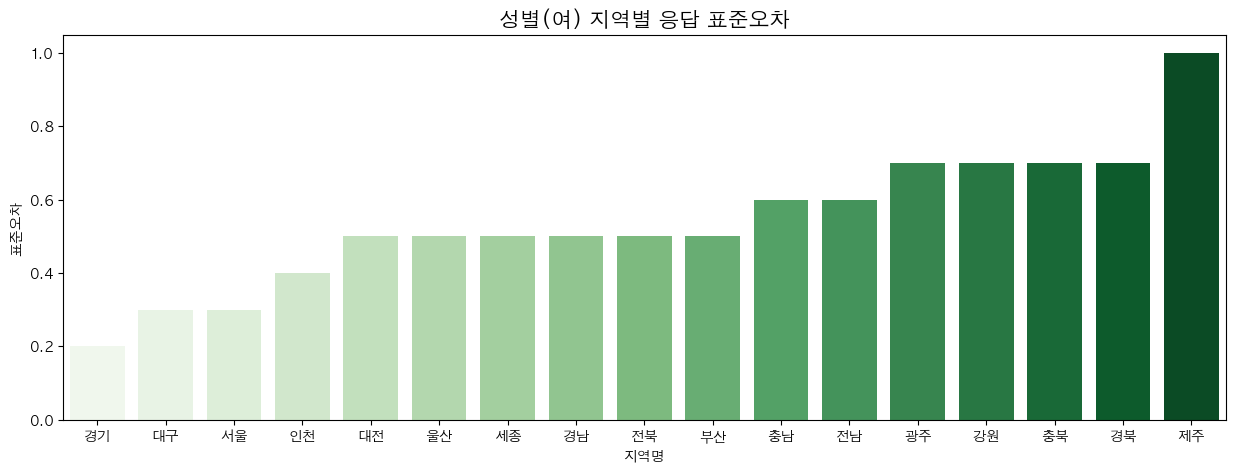

In [83]:
# 지역별(서울~제주) 표준오차
# sns.FacetGrid 이용
c = KOSIS2_female.loc[61:, ['응답자특성별(2)', '흡연율', '표준오차']].sort_values('표준오차')
plt.figure(figsize=(15, 5))
sns.barplot(data=c, x='응답자특성별(2)', y='표준오차', hue='응답자특성별(2)', errorbar=('ci', 95), palette='Greens')
plt.xlabel('지역명')
plt.title('성별(여) 지역별 응답 표준오차', fontdict={'size':15})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()